For Capstone Use

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# 1. Introduction


## 1.1 Background

Seattle is a city which is located at the northwest coast of America by the Pecific Ocean. The coordination of the city center is 47°37'35" N, 122°19'59" W. The total area of Seattle is about 369.2 square kilometers. Rain season starts from November to March next year in Seattle, it is the top 15 city which rains the most in US, and 8th worst traffic condition. but the government is trying to solve the traffic problem. 


## 1.2 Problem

As stated in the Coursera module, the problem now is to use the history traffic accident data with the details to build a model, to predict the severity of the coming traffic accidents based on the details provided.

# 2. Data Preprocessing

## 2.1 Data Obtain

The dataset proveid by Seattle Police Department is very detailed and content-rich. There are 194,673 rows and 38 variables. The data has to be preprocessed before we build the model.


In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
import datetime as dt

## 2.2 Data Preprocessing

From the datas showed above, we can determine that 'SEVERITYCODE' is the dependent variable and some of the variables we can merge and drop to make the dataset more efficient. First, we shall drop some of the data which is unpredictable and the columns which containing lots of 'NaN' values in it.
So the left variables are 'SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'INCDTTM'.

In [4]:
df_dp1 = df[['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'INCDTTM']]
df_dp1['INCDTTM'] = pd.to_datetime(df_dp1['INCDTTM'])
df_dp1['time'] = df_dp1['INCDTTM'].dt.time
df_dp1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,INCDTTM,time
0,2,Intersection,Overcast,Wet,Daylight,10,2013-03-27 14:54:00,14:54:00
1,1,Block,Raining,Wet,Dark - Street Lights On,11,2006-12-20 18:55:00,18:55:00
2,1,Block,Overcast,Dry,Daylight,32,2004-11-18 10:20:00,10:20:00
3,1,Block,Clear,Dry,Daylight,23,2013-03-29 09:26:00,09:26:00
4,2,Intersection,Raining,Wet,Daylight,10,2004-01-28 08:04:00,08:04:00


In [5]:
df_dp1 = df_dp1.drop(['INCDTTM'], axis=1)
df_dp1.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,time
0,2,Intersection,Overcast,Wet,Daylight,10,14:54:00
1,1,Block,Raining,Wet,Dark - Street Lights On,11,18:55:00
2,1,Block,Overcast,Dry,Daylight,32,10:20:00
3,1,Block,Clear,Dry,Daylight,23,09:26:00
4,2,Intersection,Raining,Wet,Daylight,10,08:04:00


Then drop the rows contains null values and count the numbers for each variable.

In [6]:
df_dp1 = df_dp1.dropna();
print(df_dp1.isnull().sum().sum())

0


In [7]:
print(df_dp1['SEVERITYCODE'].value_counts())
print(df_dp1['ADDRTYPE'].value_counts())
print(df_dp1['WEATHER'].value_counts())
print(df_dp1['ROADCOND'].value_counts())
print(df_dp1['LIGHTCOND'].value_counts())

1    130637
2     56870
Name: SEVERITYCODE, dtype: int64
Block           123317
Intersection     63448
Alley              742
Name: ADDRTYPE, dtype: int64
Clear                       110494
Raining                      32969
Overcast                     27545
Unknown                      14059
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               123731
Wet                47213
Unknown            14007
Ice                 1192
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    115396
Dark - Street Lights On      48233
Unknown                      12599
Dusk                          5842
Dawn                          2490
Dar

Numberize the data so all the Machine Learning tools can process the data.

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder = LabelEncoder()
df_dp1['ADDRTYPE'] = labelencoder.fit_transform(df_dp1['ADDRTYPE'])
df_dp1['WEATHER'] = labelencoder.fit_transform(df_dp1['WEATHER'])
df_dp1['ROADCOND'] = labelencoder.fit_transform(df_dp1['ROADCOND'])
df_dp1['LIGHTCOND'] = labelencoder.fit_transform(df_dp1['LIGHTCOND'])
df_dp1.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,time
0,2,2,4,8,5,10,14:54:00
1,1,1,6,8,2,11,18:55:00
2,1,1,4,0,5,32,10:20:00
3,1,1,1,0,5,23,09:26:00
4,2,2,6,8,5,10,08:04:00


Now our data set is ready to be processed by ML tools.

# 3. Exploratory Data Analysis

## 3.1 Machine Learning Tools

Let us split the whole data set randomly and saperate the dataframe into training set and test set. Since all the variables are influencing the dependent variable, y is the dataframe with 'SEVERITYCODE' and X is the dataframe with 'ADDRTYPE', 'WEATHER', 'ROADCOND' and 'LIGHTCOND'. 

And we split 30% of the dataset as test data and the random state equals 4.

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [10]:
X = df_dp1[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
X.head()

,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,4,8,5
1,1,6,8,2
2,1,4,0,5
3,1,1,0,5
4,2,6,8,5


In [11]:
y = df_dp1['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [12]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.38633279,  0.33718311,  1.48659235,  0.36199765],
       [-0.69655999,  1.04639592,  1.48659235, -1.40136434],
       [-0.69655999,  0.33718311, -0.7067657 ,  0.36199765],
       [-0.69655999, -0.72663609, -0.7067657 ,  0.36199765],
       [ 1.38633279,  1.04639592,  1.48659235,  0.36199765]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131254, 4) (131254,)
Test set: (56253, 4) (56253,)


## 3.2 Machine Learning Tools Application

### 3.2.1 K Nearest Neighbor(KNN)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [18]:
Ks = 15

neigh = KNeighborsClassifier(n_neighbors = Ks).fit(X_train,y_train)
neigh

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6949140490284963 with k= 6


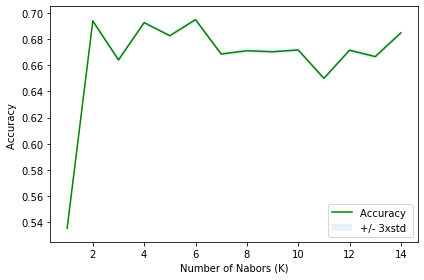

In [19]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat=neigh.predict(X_test)
KNN_f1 = f1_score(y_test, yhat, average='weighted') 
KNN_jac = jaccard_similarity_score(y_test, yhat)

print( "f1 = ",KNN_f1)
print( "jac = ",KNN_jac)

f1 =  0.5843517165431125
jac =  0.6948962721988161


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


For KNN model, the best accuracy is when k = 6.

And f1 score equals 0.5844, jaccard similarity score equals 0.6949.

Decision Tree is not quite fit for this model, so we will pass on that.

### 3.2.2 Support Vector Machine

In [15]:
import scipy.optimize as opt
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat3 = clf.predict(X_test)

SVM_f1 = f1_score(y_test, yhat3, average='weighted') 
SVM_jac = jaccard_similarity_score(y_test, yhat3)

print( "f1 = ",SVM_f1)
print( "jac = ",SVM_jac)

f1 =  0.5740515177883644
jac =  0.6981494320302917


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


For the Support Vector Machine, f1 score equals 0.5741, the jaccard similarity score equals 0.6981.

### 3.2.3 Logistic Regression

The logistic regression model can be built as shown below.

In [18]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [20]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat4 = LR.predict(X_test)

LR_f1 = f1_score(y_test, yhat4, average='weighted') 
LR_jac = jaccard_similarity_score(y_test, yhat4)

print( "f1 = ",LR_f1)
print( "jac = ",LR_jac)

f1 =  0.5796698560444287
jac =  0.696993938101079


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [21]:
yhat4_prob = LR.predict_proba(X_test)
LR_LL = log_loss(y_test, yhat4_prob)
print( "Log Loss = ",LR_LL)

Log Loss =  0.5869510486464813


For the Support Vector Machine, f1 score equals 0.5741, the jaccard similarity score equals 0.6981.

## 3.3 Evaluation Report

The matrix for different machine learning method of f1 score and jaccard similarity score can be generated as shown.

In [25]:
r = {'Algorithm': ["KNN", "SVM", "LogisticRegression"],
          'Jaccard': [KNN_jac, SVM_jac, LR_jac],
          'F1-score': [KNN_f1, SVM_f1, LR_f1],
          'LogLoss': ["NA", "NA", LR_LL]}
report = pd.DataFrame(data=r)
report.head()

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.694896,0.584352,NA
1,SVM,0.698149,0.574052,NA
2,LogisticRegression,0.696994,0.579670,0.586951


There are not too much difference among three machine learning methods, so all three of them can be used as the machine learning tools to predict the serverity of an accident.

## 3.4 Relationship Between Dependent Variable and Single Variable.

The relationship between dependent varibale and a single variable can be analyzed more easily via charts.

### 3.4.1 'SEVERITYCODE' and 'ADDRTYPE'

From the metadata file, we can know that the 'ADDRTYPE' indicates the address types of where accidents happened, there are block, intercection and alley, we can directly find some information from the chart.


In [26]:
# obtain data for chart 1
df_dp2 = df[['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'INCDTTM']]
df_dp2 = df_dp2.dropna();
df_c1 = df_dp2[['SEVERITYCODE', 'ADDRTYPE']]
df_c1.head()

,SEVERITYCODE,ADDRTYPE
0,2,Intersection
1,1,Block
2,1,Block
3,1,Block
4,2,Intersection


In [27]:
!conda install -c anaconda seaborn -y
import seaborn as sns

Solving environment: ...working... done

# All requested packages already installed.



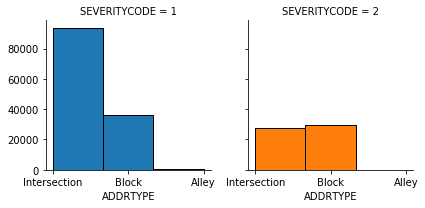

In [46]:
bins = 3
g = sns.FacetGrid(df_c1, col="SEVERITYCODE", hue="SEVERITYCODE", col_wrap=2)
g.map(plt.hist, 'ADDRTYPE', bins=bins, ec="k")


plt.show()

We can see from the bar chart, there are about the same number of accidents happened in block and alley for both severity code of 1 and 2. But for Intersection, severity code 1 accident is about four times more than severity code 2 accident.


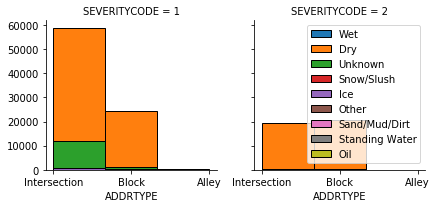

In [44]:
bins = 3
g = sns.FacetGrid(df, col="SEVERITYCODE",hue="ROADCOND", col_wrap=3)
g.map(plt.hist, 'ADDRTYPE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### 3.4.2 'SEVERITYCODE' and 'ROADCON'

Belows are the pie charts generated based on the data of 'SEVERITYCODE' and 'ROADCON'

In [54]:
# sort data contains 'SEVERITYCODE', 'ADDRTYPE', 'ROADCOND'
df_c2 = df_dp2[['SEVERITYCODE', 'ADDRTYPE', 'ROADCOND']]
df_s1 = df_c2.drop(df_c2[df_c2.SEVERITYCODE == 2].index)
df_s2 = df_c2.drop(df_c2[df_c2.SEVERITYCODE == 1].index)

In [56]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [59]:
df_s1p.head()

,SEVERITYCODE
ROADCOND,
Dry,83833
Ice,923
Oil,40
Other,82
Sand/Mud/Dirt,51


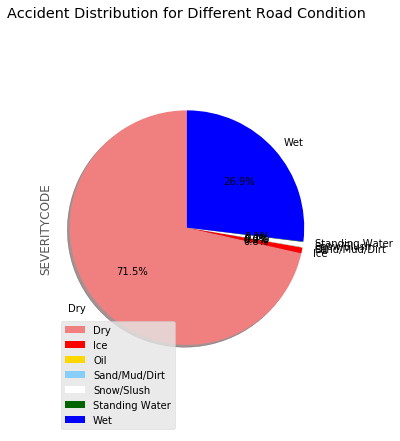

In [79]:
# plot pie chart for with severity code equals 1 and road condition
df_s1.drop(df_s1[df_s1.ROADCOND == "Unknown"].index, inplace = True)
df_s1.drop(df_s1[df_s1.ROADCOND == "Other"].index, inplace = True)
df_s1p = df_s1.groupby('ROADCOND', axis=0).sum()

colors = ['lightcoral','red', 'gold', 'lightskyblue', 
          'white', 'darkgreen','blue']

df_s1p['SEVERITYCODE'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.tight_layout()
plt.title('Accident Distribution for Different Road Condition')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_s1p.index, loc=3)

plt.show()

For severity level 1, dry road condition takes majority of the accidents, about 71.5 percent, the second most part is wet road condition, about 26.9%. let's drop the data for dry condtion, and replot the chart.

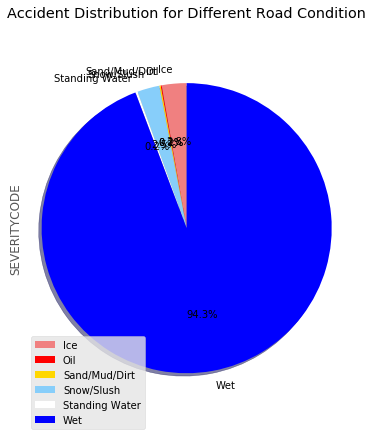

In [83]:
# drop the data with dry and replot the chart
df_s1.drop(df_s1[df_s1.ROADCOND == "Dry"].index, inplace = True)
df_s1p = df_s1.groupby('ROADCOND', axis=0).sum()

colors = ['lightcoral','red', 'gold', 'lightskyblue', 
          'white', 'blue']

df_s1p['SEVERITYCODE'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.tight_layout()
plt.title('Accident Distribution for Different Road Condition')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_s1p.index, loc=3)

plt.show()

Despite of dry road condition, wet road condtion takes the absolute majority of all the accidents.

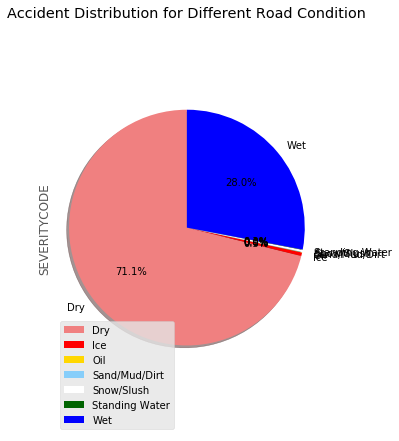

In [81]:

# plot pie chart for with severity code equals 2 and road condition
df_s2.drop(df_s2[df_s2.ROADCOND == "Unknown"].index, inplace = True)
df_s2.drop(df_s2[df_s2.ROADCOND == "Other"].index, inplace = True)
df_s2p = df_s2.groupby('ROADCOND', axis=0).sum()

colors = ['lightcoral','red', 'gold', 'lightskyblue', 
          'white', 'darkgreen','blue']

df_s2p['SEVERITYCODE'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.tight_layout()
plt.title('Accident Distribution for Different Road Condition')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_s2p.index, loc=3)

plt.show()

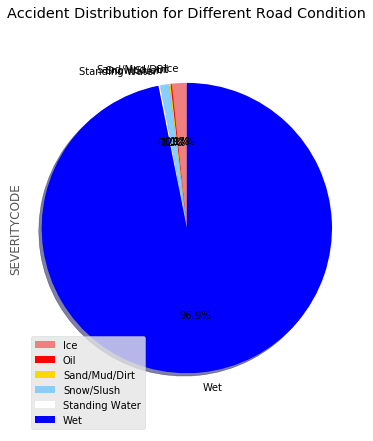

In [84]:
# drop the data with dry and replot the chart
df_s2.drop(df_s2[df_s2.ROADCOND == "Dry"].index, inplace = True)
df_s2p = df_s2.groupby('ROADCOND', axis=0).sum()

colors = ['lightcoral','red', 'gold', 'lightskyblue', 
          'white', 'blue']

df_s2p['SEVERITYCODE'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.tight_layout()
plt.title('Accident Distribution for Different Road Condition')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_s1p.index, loc=3)

plt.show()

As we can see from the above two pie charts, dry road condition takes the majority of the accidents of severity coad 2. And after extract the dry condtion, wet road condtion takes dominant in the rest of the dataset.

Let's examine under a cirtain circumstance, what is the distribution of the two severity codes.

In [89]:
# c3 for different road conditions
df_c3 = df_dp2[['SEVERITYCODE','ROADCOND']]
df_c3dry = df_c3[df_c3['ROADCOND'] == "Dry"]
df_c3wet = df_c3[df_c3['ROADCOND'] == "Wet"]
df_c3ice = df_c3[df_c3['ROADCOND'] == "Ice"]
df_c3smd = df_c3[df_c3['ROADCOND'] == "Sand/Mud/Dirt"]
df_c3ss = df_c3[df_c3['ROADCOND'] == "Snow/Slush"]
df_c3sw = df_c3[df_c3['ROADCOND'] == "Standing Water"]

In [93]:
df_c3dryp = df_c3dry.groupby('SEVERITYCODE', axis=0).count()
df_c3dryp.head()

,ROADCOND
SEVERITYCODE,
1,83833
2,39898


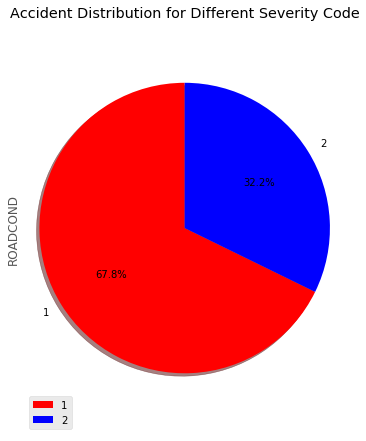

In [100]:
colors = ['red', 'blue']

df_c3dryp['ROADCOND'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.tight_layout()
plt.title('Accident Distribution for Different Severity Code')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_c3dryp.index, loc=3)

plt.show()

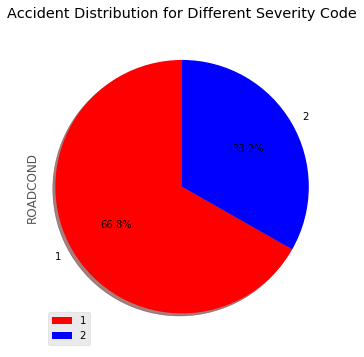

In [95]:
df_c3wetp = df_c3wet.groupby('SEVERITYCODE', axis=0).count()

colors = ['red', 'blue']

df_c3wetp['ROADCOND'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.title('Accident Distribution for Different Severity Code')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_c3wetp.index, loc=3)

plt.show()

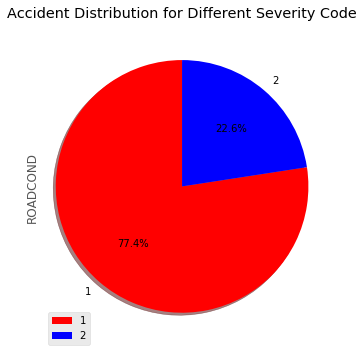

In [96]:
df_c3icep = df_c3ice.groupby('SEVERITYCODE', axis=0).count()

colors = ['red', 'blue']

df_c3icep['ROADCOND'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.title('Accident Distribution for Different Severity Code')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_c3icep.index, loc=3)

plt.show()

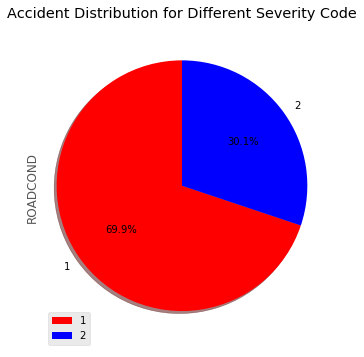

In [97]:
df_c3smdp = df_c3smd.groupby('SEVERITYCODE', axis=0).count()

colors = ['red', 'blue']

df_c3smdp['ROADCOND'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.title('Accident Distribution for Different Severity Code')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_c3smdp.index, loc=3)

plt.show()

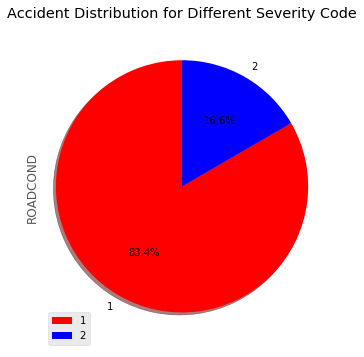

In [98]:
df_c3ssp = df_c3ss.groupby('SEVERITYCODE', axis=0).count()

colors = ['red', 'blue']

df_c3ssp['ROADCOND'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.title('Accident Distribution for Different Severity Code')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_c3ssp.index, loc=3)

plt.show()

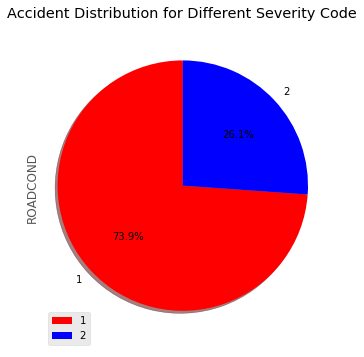

In [99]:
df_c3swp = df_c3sw.groupby('SEVERITYCODE', axis=0).count()

colors = ['red', 'blue']

df_c3swp['ROADCOND'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors
                            )
plt.title('Accident Distribution for Different Severity Code')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_c3swp.index, loc=3)

plt.show()

As we can see from the pie charts, accidents with severity level 2 takes about 1/5 to 1/3 in every kind of raod condition. Level 1 always take the majority of all accidents. Which means, the road condition does not affect the severity of the accidents a lot. The machine learning would fit the model very well.

### 3.4.2 'SEVERITYCODE' and 'WEATHER'

In [105]:
# Extract the data of severity code and weather
df_c4 = df_dp2[['SEVERITYCODE', 'WEATHER']]
df_c4.head()

,SEVERITYCODE,WEATHER
0,2,Overcast
1,1,Raining
2,1,Overcast
3,1,Clear
4,2,Raining


In [134]:
df_c4.drop(df_c4[df_c4.WEATHER == "Other"].index, inplace = True)
df_c4.drop(df_c4[df_c4.WEATHER == "Unknown"].index, inplace = True)

df_c4t = df_c4.drop(df_c4[df_c4.SEVERITYCODE == 1].index)

df_c4tt = df_c4t.groupby('WEATHER', axis=0).count()

df_c4tt.head(15)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE
WEATHER,
Blowing Sand/Dirt,13
Clear,35718
Fog/Smog/Smoke,186
Overcast,8711
Partly Cloudy,3
Raining,11134
Severe Crosswind,7
Sleet/Hail/Freezing Rain,27
Snowing,167


In [135]:
df_c4tt = df_c4tt.transpose()
df_c4tt.head()

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
SEVERITYCODE,13,35718,186,8711,3,11134,7,27,167


In [136]:
df_c4tt.reset_index(inplace = True)
df_c4tt.head()

WEATHER,index,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,SEVERITYCODE,13,35718,186,8711,3,11134,7,27,167


In [137]:
df_c4tt.replace('SEVERITYCODE', '2', inplace = True)
df_c4tt.head()

WEATHER,index,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,13,35718,186,8711,3,11134,7,27,167


In [116]:
df_c4t_ = df_c4.drop(df_c4[df_c4.SEVERITYCODE == 2].index)

df_c4tt_ = df_c4t_.groupby('WEATHER', axis=0).count()

df_c4tt_.head(15)

,SEVERITYCODE
WEATHER,
Blowing Sand/Dirt,36
Clear,74776
Fog/Smog/Smoke,377
Overcast,18834
Partly Cloudy,2
Raining,21835
Severe Crosswind,18
Sleet/Hail/Freezing Rain,85
Snowing,729


In [133]:
df_c4tt_ = df_c4tt_.transpose()
df_c4tt_.reset_index(inplace = True)
df_c4tt_.replace('SEVERITYCODE', '1', inplace = True)
df_c4tt_.head()

WEATHER,index,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,1,36,74776,377,18834,2,21835,18,85,729


In [143]:
df_c4f = pd.concat([df_c4tt,df_c4tt_],axis=0)

df_c4f.head()

WEATHER,index,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,13,35718,186,8711,3,11134,7,27,167
0,1,36,74776,377,18834,2,21835,18,85,729


In [144]:
df_c4f.rename(columns={'index':'SEVERITYCODE'}, inplace=True)
df_c4f.head()

WEATHER,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,13,35718,186,8711,3,11134,7,27,167
0,1,36,74776,377,18834,2,21835,18,85,729


In [145]:
df_c4f.set_index(["SEVERITYCODE"], inplace=True)
df_c4f.head()

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
SEVERITYCODE,,,,,,,,,
2,13,35718,186,8711,3,11134,7,27,167
1,36,74776,377,18834,2,21835,18,85,729


In [147]:
df_c4f = df_c4f.transpose()
df_c4f.head()

SEVERITYCODE,2,1
WEATHER,,
Blowing Sand/Dirt,13,36
Clear,35718,74776
Fog/Smog/Smoke,186,377
Overcast,8711,18834
Partly Cloudy,3,2


In [148]:
df_c4f['Total'] = df_c4f.sum(axis=1)
df_c4f.head(11)

SEVERITYCODE,2,1,Total
WEATHER,,,
Blowing Sand/Dirt,13,36,49
Clear,35718,74776,110494
Fog/Smog/Smoke,186,377,563
Overcast,8711,18834,27545
Partly Cloudy,3,2,5
Raining,11134,21835,32969
Severe Crosswind,7,18,25
Sleet/Hail/Freezing Rain,27,85,112
Snowing,167,729,896


In [150]:
df_c4f['1 Percentage'] = df_c4f['1']/df_c4f['Total']
df_c4f['2 Percentage'] = df_c4f['2']/df_c4f['Total']
df_c4f.head(11)

SEVERITYCODE,2,1,Total,1 Percentage,2 Percentage
WEATHER,,,,,
Blowing Sand/Dirt,13,36,49,0.734694,0.265306
Clear,35718,74776,110494,0.676743,0.323257
Fog/Smog/Smoke,186,377,563,0.669627,0.330373
Overcast,8711,18834,27545,0.683754,0.316246
Partly Cloudy,3,2,5,0.400000,0.600000
Raining,11134,21835,32969,0.662289,0.337711
Severe Crosswind,7,18,25,0.720000,0.280000
Sleet/Hail/Freezing Rain,27,85,112,0.758929,0.241071
Snowing,167,729,896,0.813616,0.186384


From the chart, we can know that dispite of the accidents happened during the clear days, most accidents were happened under raining and overcast, and the distribution of two severity codes are about the same in all varialbes. Which means it does not affect the dataset a lot, the machine learning tool could be able to predict the result accurately.

### 3.4.3  'SEVERITYCODE' and 'LIGHTCOND'

In [153]:
df_c5 = df_dp2[['SEVERITYCODE', 'LIGHTCOND']]
df_c5.head()

,SEVERITYCODE,LIGHTCOND
0,2,Daylight
1,1,Dark - Street Lights On
2,1,Daylight
3,1,Daylight
4,2,Daylight


In [159]:
# drop other & unknown
df_c5.drop(df_c5[df_c5.LIGHTCOND == "Other"].index, inplace = True)
df_c5.drop(df_c5[df_c5.LIGHTCOND == "Unknown"].index, inplace = True)

# extract SC == 1
df_c5t = df_c5.drop(df_c5[df_c5.SEVERITYCODE == 2].index)
df_c5tt = df_c5t.groupby('LIGHTCOND', axis=0).count()
df_c5tt = df_c5tt.transpose()
df_c5tt.reset_index(inplace = True)
df_c5tt.replace('SEVERITYCODE', '1', inplace = True)

# extract SC == 2
df_c5t_ = df_c5.drop(df_c5[df_c5.SEVERITYCODE == 1].index)
df_c5tt_ = df_c5t_.groupby('LIGHTCOND', axis=0).count()
df_c5tt_ = df_c5tt_.transpose()
df_c5tt_.reset_index(inplace = True)
df_c5tt_.replace('SEVERITYCODE', '2', inplace = True)


In [163]:
# merge two dataframes
df_c5f = pd.concat([df_c5tt,df_c5tt_],axis=0)
df_c5f.rename(columns={'index':'SEVERITYCODE'}, inplace=True)
df_c5f.set_index(["SEVERITYCODE"], inplace=True)
df_c5f = df_c5f.transpose()
df_c5f['Total'] = df_c5f.sum(axis=1)
df_c5f['1 Percentage'] = df_c5f['1']/df_c5f['Total']
df_c5f['2 Percentage'] = df_c5f['2']/df_c5f['Total']
df_c5f.head(15)

SEVERITYCODE,1,2,Total,1 Percentage,2 Percentage
LIGHTCOND,,,,,
Dark - No Street Lights,1191,334,1525,0.780984,0.219016
Dark - Street Lights Off,869,315,1184,0.733953,0.266047
Dark - Street Lights On,33816,14417,48233,0.701097,0.298903
Dark - Unknown Lighting,7,4,11,0.636364,0.363636
Dawn,1667,823,2490,0.669478,0.330522
Daylight,76996,38400,115396,0.667233,0.332767
Dusk,3906,1936,5842,0.668607,0.331393


From the chart we can get that there are more severity level 1 accident when there is no street light during night time compared with other cases. There are too few cases under the category of unknown lighting, we shall pass on that. The rest sets are distributed evenly on severity level 1 take about 70 percent of all accidents.

One odd scene is that there are more accidents happened when there are street lights on compared with there is no steet light.